In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10

In [4]:
tf.__version__

'2.0.0-alpha0'

# Load the cifar10 data

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [12]:
from matplotlib import pyplot

In [13]:
labels_str = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [19]:
y_train = y_train.reshape(-1,)
y_train.shape

(50000,)

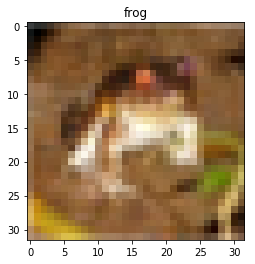

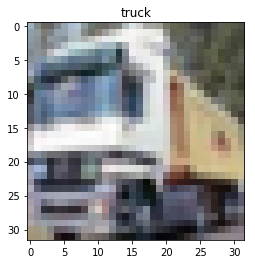

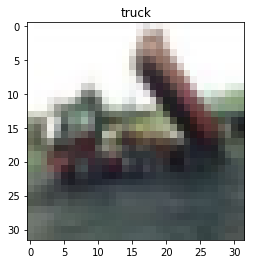

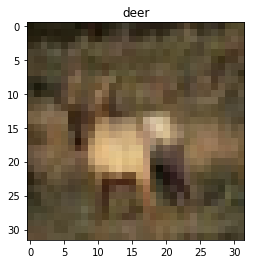

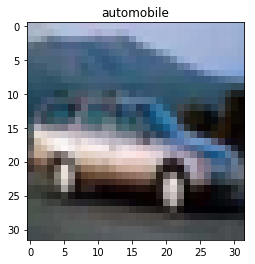

In [21]:
for i in range(5):
    pyplot.imshow(x_train[i])
    pyplot.title(labels_str[y_train[i]])
    pyplot.show()

In [22]:
x_train = x_train.reshape(-1, 32 * 32 * 3)

In [23]:
x_test = x_test.reshape(-1, 32 * 32 * 3)

In [24]:
x_train.shape

(50000, 3072)

In [25]:
x_train = x_train / 255

In [26]:
x_test = x_test / 255

In [27]:
x_train[:10]

array([[0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
        0.28235294],
       [0.60392157, 0.69411765, 0.73333333, ..., 0.56078431, 0.52156863,
        0.56470588],
       [1.        , 1.        , 1.        , ..., 0.31372549, 0.3372549 ,
        0.32941176],
       ...,
       [0.10980392, 0.1372549 , 0.15294118, ..., 0.39607843, 0.54901961,
        0.37647059],
       [0.5254902 , 0.72941176, 0.8745098 , ..., 0.1254902 , 0.36862745,
        0.54117647],
       [0.49019608, 0.49019608, 0.45490196, ..., 0.56470588, 0.45490196,
        0.3372549 ]])

# Define the keras sequencial model.

In [66]:
model = tf.keras.models.Sequential()

# Add a dense layer to the model

In [73]:
hidden_size = 512
model.add(tf.keras.layers.Dense(units = hidden_size, activation='relu', input_shape=(32 * 32 * 3, ), kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dense(units = hidden_size, activation='relu', input_shape=(512, ), kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.3))

In [68]:
output_size = 10
model.add(tf.keras.layers.Dense(units = output_size, activation='softmax'))

In [69]:
learning_rate = 0.001
adam = tf.optimizers.Adam(learning_rate)
model.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [70]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.fit(x_train, y_train, batch_size = 256, epochs = 10)

Epoch 1/10
50000/50000 [==============================] - 5s 100us/sample - loss: 4.7150 - sparse_categorical_accuracy: 0.2859
Epoch 2/10
50000/50000 [==============================] - 5s 95us/sample - loss: 2.1000 - sparse_categorical_accuracy: 0.3560
Epoch 3/10
50000/50000 [==============================] - 5s 101us/sample - loss: 1.9265 - sparse_categorical_accuracy: 0.3737
Epoch 4/10
50000/50000 [==============================] - 5s 104us/sample - loss: 1.8560 - sparse_categorical_accuracy: 0.3893
Epoch 5/10
50000/50000 [==============================] - 5s 94us/sample - loss: 1.8368 - sparse_categorical_accuracy: 0.3928
Epoch 6/10
50000/50000 [==============================] - 5s 93us/sample - loss: 1.8094 - sparse_categorical_accuracy: 0.3996
Epoch 7/10
50000/50000 [==============================] - 5s 92us/sample - loss: 1.7749 - sparse_categorical_accuracy: 0.4125
Epoch 8/10
50000/50000 [==============================] - 5s 92us/sample - loss: 1.7811 - sparse_categorical_accura

In [72]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 140us/sample - loss: 1.7209 - sparse_categorical_accuracy: 0.4282


In [50]:
n_images = 5
test_images = x_test[:n_images]
test_labels = y_test[:n_images]

In [53]:
test_images.shape

(5, 3072)

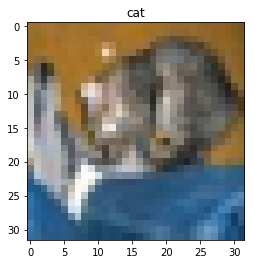

[0.03305374 0.0280472  0.11194482 0.41096875 0.07004016 0.24445173
 0.05653596 0.00782308 0.02837855 0.00875597]
cat


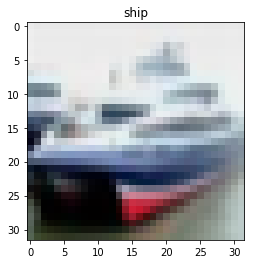

[4.9072381e-02 1.4223441e-01 1.4929330e-03 4.7271789e-04 5.3813210e-04
 7.9909347e-05 9.3645423e-05 8.4948062e-04 5.1197714e-01 2.9318923e-01]
ship


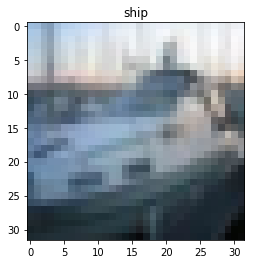

[2.21449122e-01 1.73656866e-01 2.88045220e-03 7.93201209e-04
 2.75758258e-03 6.74630399e-04 2.61802943e-05 2.64003570e-03
 4.75189686e-01 1.19932316e-01]
ship


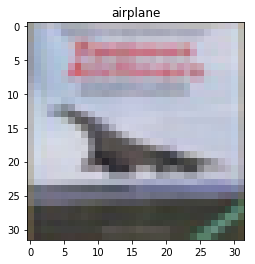

[0.15123524 0.09529184 0.10478333 0.02837531 0.07099671 0.01800211
 0.00070792 0.09213098 0.33332142 0.10515511]
ship


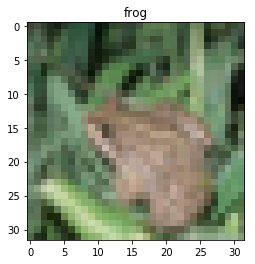

[1.9178911e-03 5.5415393e-04 4.3778155e-02 1.3755939e-02 8.1287622e-01
 1.9941781e-02 9.9264666e-02 4.5386115e-03 2.7821911e-03 5.9027673e-04]
deer


In [62]:
prediction = model.predict(test_images)
for i in range(n_images):
    pyplot.imshow(np.reshape(test_images[i], [32, 32, 3]))
    label = np.argmax(prediction[i])
    pyplot.title(labels_str[test_labels[i][0]])
    pyplot.show()
    print(prediction[i])
    print(labels_str[label])